#### Author: MengChen Chung

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr

In [28]:
import geopandas as gpd
import pandas as pd

In [3]:
from shapely.geometry import mapping

In [29]:
shape = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

In [5]:
shape

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [33]:
shape.iloc[26]

STATEFP                                                    20
STATENS                                              00481813
AFFGEOID                                          0400000US20
GEOID                                                      20
STUSPS                                                     KS
NAME                                                   Kansas
LSAD                                                       00
ALAND                                            211755344060
AWATER                                             1344141205
geometry    POLYGON ((-102.051744 40.003078, -101.916696 4...
Name: 26, dtype: object

In [6]:
crs = shape.crs
crs

{'init': 'epsg:4269'}

In [22]:
KS = shape.geometry[26]
OK = shape.geometry[2]
ARK = shape.geometry[52]
LA = shape.geometry[5]
MS = shape.geometry[0]
MO = shape.geometry[20]
AL = shape.geometry[17]
TN = shape.geometry[23]
GA = shape.geometry[18]

In [30]:
#https://geopandas.org/docs/user_guide/data_structures.html
KS.bounds #tuple of max and min coordinates on each axis for each shape

(-102.051744, 36.993016, -94.588413, 40.003161999999996)

In [34]:
ARK.bounds

(-94.617919, 33.004106, -89.644395, 36.4996)

In [98]:
from pyhdf.SD import SD, SDC

In [212]:
file_name = 'MOD13A1.A2021129.h11v04.061.2021146090050.hdf'

In [213]:
file = SD(file_name, SDC.READ)

In [214]:
file.datasets()

{'500m 16 days NDVI': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_500m_VI'),
  (2400, 2400),
  22,
  0),
 '500m 16 days EVI': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_500m_VI'),
  (2400, 2400),
  22,
  1),
 '500m 16 days VI Quality': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_500m_VI'),
  (2400, 2400),
  23,
  2),
 '500m 16 days red reflectance': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_500m_VI'),
  (2400, 2400),
  22,
  3),
 '500m 16 days NIR reflectance': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_500m_VI'),
  (2400, 2400),
  22,
  4),
 '500m 16 days blue reflectance': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_500m_VI'),
  (2400, 2400),
  22,
  5),
 '500m 16 days MIR reflectance': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_500m_VI'),
  (2400, 2400),
  22,
  6),
 '500m 16 days view zenith angle': (('YDim:MODIS_Grid_16DAY_500m_VI',
   'XDim:MODIS_Grid_16DAY_

In [215]:
datasets_dic = file.datasets()

In [216]:
import gdal # Import GDAL library bindings

# The file that we shall be using
# Needs to be on current directory

g = gdal.Open(file_name)
# g should now be a GDAL dataset, but if the file isn't found
# g will be none. Let's test this:
if g is None:
    print("Problem opening file %s!" % file_name)
else:
    print("File %s opened fine" % file_name)
    
    
subdatasets = g.GetSubDatasets()
for fname, name in subdatasets:
    print(name)
    print("\t", fname)


File MOD13A1.A2021129.h11v04.061.2021146090050.hdf opened fine
[2400x2400] 500m 16 days NDVI MODIS_Grid_16DAY_500m_VI (16-bit integer)
	 HDF4_EOS:EOS_GRID:"MOD13A1.A2021129.h11v04.061.2021146090050.hdf":MODIS_Grid_16DAY_500m_VI:500m 16 days NDVI
[2400x2400] 500m 16 days EVI MODIS_Grid_16DAY_500m_VI (16-bit integer)
	 HDF4_EOS:EOS_GRID:"MOD13A1.A2021129.h11v04.061.2021146090050.hdf":MODIS_Grid_16DAY_500m_VI:500m 16 days EVI
[2400x2400] 500m 16 days VI Quality MODIS_Grid_16DAY_500m_VI (16-bit unsigned integer)
	 HDF4_EOS:EOS_GRID:"MOD13A1.A2021129.h11v04.061.2021146090050.hdf":MODIS_Grid_16DAY_500m_VI:500m 16 days VI Quality
[2400x2400] 500m 16 days red reflectance MODIS_Grid_16DAY_500m_VI (16-bit integer)
	 HDF4_EOS:EOS_GRID:"MOD13A1.A2021129.h11v04.061.2021146090050.hdf":MODIS_Grid_16DAY_500m_VI:500m 16 days red reflectance
[2400x2400] 500m 16 days NIR reflectance MODIS_Grid_16DAY_500m_VI (16-bit integer)
	 HDF4_EOS:EOS_GRID:"MOD13A1.A2021129.h11v04.061.2021146090050.hdf":MODIS_Grid_16

In [217]:
lc_data = gdal.Open ( 'HDF4_EOS:EOS_GRID:"MOD13A1.A2021129.h11v04.061.2021146090050.hdf":MODIS_Grid_16DAY_500m_VI:500m 16 days NDVI' )

In [219]:
lc = lc_data.ReadAsArray()

In [132]:
(lc.nbytes/(8*1024*1024.))

1.373291015625

In [133]:
(lc.min(), lc.max(), lc.mean(), lc.std())

(-3000, 9318, 4523.405232465278, 1971.3983649299)

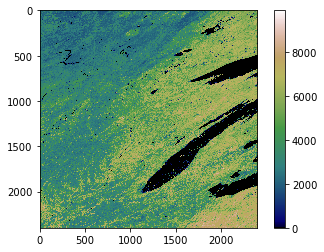

In [220]:
plt.imshow ( lc, interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth);
plt.colorbar();

In [113]:
datafile = gdal.Open(file_name)
print("Driver: ",datafile.GetDriver().ShortName, datafile.GetDriver().LongName)
print("Size is ", datafile.RasterXSize, datafile.RasterYSize)
print("Bands = ", datafile.RasterCount)
print("Coordinate System is:", datafile.GetProjectionRef ())
print("GetGeoTransform() = ", datafile.GetGeoTransform ())
print("GetMetadata() = ", datafile.GetMetadata ())

Driver:  HDF4 Hierarchical Data Format Release 4
Size is  512 512
Bands =  0
Coordinate System is: 
GetGeoTransform() =  (0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
GetMetadata() =  {'ALGORITHMPACKAGEACCEPTANCEDATE': '102004', 'ALGORITHMPACKAGEMATURITYCODE': 'Normal', 'ALGORITHMPACKAGENAME': 'MOD_PR13A1', 'ALGORITHMPACKAGEVERSION': '6', 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS', 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Terra', 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS', 'AUTOMATICQUALITYFLAG.1': 'Passed', 'AUTOMATICQUALITYFLAG.10': 'Passed', 'AUTOMATICQUALITYFLAG.11': 'Passed', 'AUTOMATICQUALITYFLAG.12': 'Passed', 'AUTOMATICQUALITYFLAG.2': 'Passed', 'AUTOMATICQUALITYFLAG.3': 'Passed', 'AUTOMATICQUALITYFLAG.4': 'Passed', 'AUTOMATICQUALITYFLAG.5': 'Passed', 'AUTOMATICQUALITYFLAG.6': 'Passed', 'AUTOMATICQUALITYFLAG.7': 'Passed', 'AUTOMATICQUALITYFLAG.8': 'Passed', 'AUTOMATICQUALITYFLAG.9': 'Passed', 'AUTOMATICQUALITYFLAGEXPLANATION.1': 'No automatic quality assessment is performed in the PGE', 'AUTOMATICQUALITY

In [112]:
subdatasets[0]

('HDF4_EOS:EOS_GRID:"MOD13A1.hdf":MODIS_Grid_16DAY_500m_VI:500m 16 days NDVI',
 '[2400x2400] 500m 16 days NDVI MODIS_Grid_16DAY_500m_VI (16-bit integer)')

In [27]:
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
# import earthpy as et
# import earthpy.plot as ep
# import earthpy.spatial as es

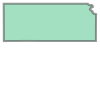

In [9]:
shape.geometry[26]

In [31]:
a = rio.open('NDVI/MOD13A1.006__500m_16_days_NDVI_doy2018001_aid0001.tif')

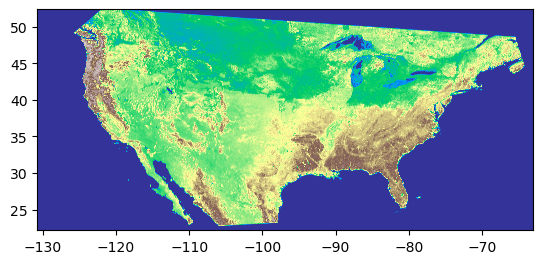

<AxesSubplot:>

In [6]:
show((a, 1), cmap='terrain')

In [32]:
import fiona
from rasterio.mask import mask

with fiona.open("cb_2018_us_state_500k/cb_2018_us_state_500k.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [163]:
shape.geometry[26].bounds

(-102.051744, 36.993016, -94.588413, 40.003161999999996)

In [33]:
out_img, out_transform = mask(dataset=a, shapes=[shapes[29]], invert=True)

In [34]:
out_img.flatten()

array([-3000, -3000, -3000, ..., -3000, -3000, -3000], dtype=int16)

In [36]:
# Copy the metadata
out_meta = a.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -3000.0, 'width': 16268, 'height': 7257, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.004166666666293395, 0.0, -130.73749998828785,
       0.0, -0.004166666666293395, 52.40833332863832)}


In [37]:
# Parse EPSG code
epsg_code = int(a.crs.data['init'][5:])
print(epsg_code)

4326


In [15]:
import pycrs
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()}
                         )

ModuleNotFoundError: No module named 'pycrs'

In [25]:
with rio.open('out.tif', "w", **out_meta) as dest:
        dest.write(out_img)

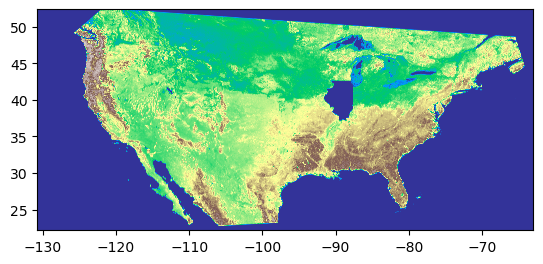

<AxesSubplot:>

In [26]:
# Open the clipped raster file
clipped = rio.open('out.tif')

# Visualize
show((clipped, 1), cmap='terrain')

In [233]:
out_transform

Affine(0.004166666666293395, 0.0, -98.39166665785223,
       0.0, -0.004166666666293395, 40.004166663082884)

In [38]:
out_img, out_transform = mask(dataset=a, shapes=[shapes[29]], crop=True)

In [39]:
with rio.open('out.tif', "w", **out_meta) as dest:
        dest.write(out_img)

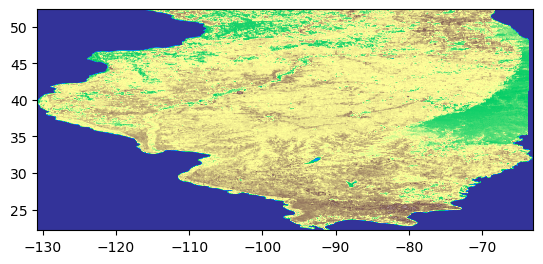

<AxesSubplot:>

In [40]:
# Open the clipped raster file
clipped = rio.open('out.tif')

# Visualize
show((clipped, 1), cmap='terrain')